In [378]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Open Data</h3>

In [379]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

<h3>Analyze Data</h3>

In [380]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [381]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [382]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

<h3>Find Missing Values</h3>

In [383]:
def percent_missing(df):
    percent_nan = 100*df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

We can see we are only missing at most 1-2% of the data.
My first thought was that maybe the same rows just don't have values for a lot of the features giving a similar percentage in missing data.

In [384]:
percent_nan = percent_missing(df_train)
percent_nan

Age             2.059128
RoomService     2.082135
Destination     2.093639
FoodCourt       2.105142
Spa             2.105142
VRDeck          2.162660
Cabin           2.289198
Name            2.300702
HomePlanet      2.312205
VIP             2.335212
ShoppingMall    2.392730
CryoSleep       2.496261
dtype: float64

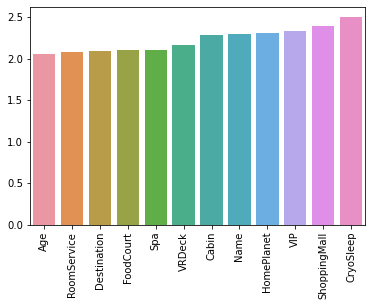

In [385]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

I took the feature VIP, since it is in the middle, to see about how many rows we have missing data, so about 93 give or less

In [386]:
df_train[df_train['VIP'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
38,0036_01,Earth,False,F/8/S,55 Cancri e,15.0,NaN,0.0,492.0,48.0,20.0,401.0,Marina Leodger,False
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,0.0,0.0,0.0,Oline Handertiz,True
145,0165_01,Mars,True,F/37/P,TRAPPIST-1e,35.0,NaN,0.0,0.0,0.0,0.0,0.0,Graven Anche,True
228,0244_02,Mars,True,F/47/S,55 Cancri e,14.0,NaN,0.0,0.0,0.0,0.0,0.0,Tous Sad,True
566,0593_01,Mars,False,D/24/P,TRAPPIST-1e,NaN,NaN,43.0,152.0,182.0,1.0,2005.0,Hon Kra,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,9074_01,Earth,True,G/1460/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,NaN,0.0,0.0,Adamie Trerady,True
8512,9081_06,Earth,False,F/1858/P,PSO J318.5-22,16.0,NaN,0.0,0.0,761.0,0.0,0.0,Daryla Clemondsey,False
8542,9122_01,Earth,True,G/1469/S,55 Cancri e,55.0,NaN,0.0,0.0,0.0,0.0,0.0,Paulas Schmondez,False
8630,9205_03,Europa,True,B/300/P,TRAPPIST-1e,52.0,NaN,0.0,0.0,0.0,0.0,0.0,Propent Brakeng,True


<h3>Feature Engineering</h3>

We look at each feature of data missing and see if we can save the data instead of dropping the feature

From the description we can see that the columns RoomService, FoodCourt, ShoppingMall, Spa, VRDeck. Are all bill amounts that each passanger has billed at the Space Titanic. By this we can assume if it's NaN it was probably 0

In [387]:
columns = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
df_train[columns] = df_train[columns].fillna(0)
df_test[columns] = df_train[columns].fillna(0)

Now we can see that it took care of 5 features

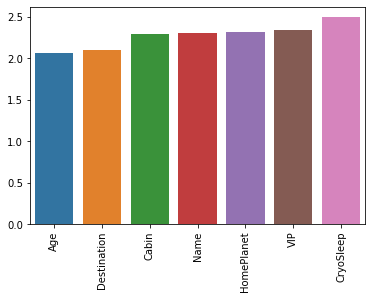

In [388]:
percent_nan = percent_missing(df_train)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

Using the same logic, VIP is a True or False value in which the passanger has purchased a VIP ticket. Logically we can fill the NaN values with False, since most likely those passagners did not purchase any.

We can see that only 74 passangers purchase it, and most people did not

In [389]:
df_train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [390]:
df_train['VIP'] = df_train['VIP'].fillna(False)

This can be also applied to CryoSleep as it was a choice if to be put in it or not

In [391]:
df_train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [392]:
df_train['CryoSleep'] = df_train['CryoSleep'].fillna(False)
df_test['CryoSleep'] = df_test['CryoSleep'].fillna(False)

We are left now with only 5 features

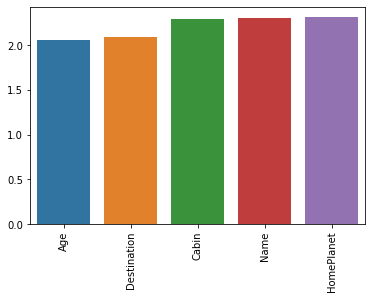

In [393]:
percent_nan = percent_missing(df_train)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

Since the pricess of different services are spread out we can add them to total_bill feature that we can create

In [394]:
df_train['TotalBill'] = df_train['RoomService'] + df_train['FoodCourt'] + df_train['ShoppingMall'] + df_train['Spa'] + df_train['VRDeck']
df_train = df_train.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis=1)

df_test['TotalBill'] = df_test['RoomService'] + df_test['FoodCourt'] + df_test['ShoppingMall'] + df_test['Spa'] + df_test['VRDeck']
df_test = df_test.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis=1)

First we look at Home Planet

In [395]:
df_train[df_train['HomePlanet'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,TotalBill
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,Colatz Keen,True,0.0
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,Batan Coning,False,9307.0
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,Arraid Inicont,True,0.0
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,Almone Sté,False,1288.0
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,Diphah Amsive,True,0.0
...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,Jurs Mone,False,1299.0
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,NaN,False,7177.0
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,False,Gian Perle,True,2416.0
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,Ties Apple,False,1148.0


In [396]:
df_train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

we are missing 87 rows, so what I am thinking is that using passengerId we can find who else the passanger of missing Homeplanet was traveling with. find a percentage of the likely home planet within that group.

For that we can split the passenger id into two features
gggg_pp -> [gggg] instead

In [397]:
df_train['Group'] = df_train['PassengerId'].str.split('_',expand=True)[0]
df_train = df_train.drop(['PassengerId'],axis=1)
df_train['Group'] = pd.to_numeric(df_train['Group'])

df_test['Group'] = df_test['PassengerId'].str.split('_',expand=True)[0]
df_test = df_test.drop(['PassengerId'],axis=1)
df_test['Group'] = pd.to_numeric(df_test['Group'])

Since Cabin contains three information, deck/num/side we want to create three features from it

In [398]:
df_train[df_train['Cabin'].isnull()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,TotalBill,Group
15,Earth,False,NaN,TRAPPIST-1e,31.0,False,Justie Pooles,False,908.0,12
93,Mars,True,NaN,TRAPPIST-1e,31.0,False,Book Trad,True,0.0,101
103,Europa,False,NaN,TRAPPIST-1e,32.0,False,Graviph Aloubtled,False,5109.0,110
222,Mars,False,NaN,TRAPPIST-1e,37.0,False,Diedow Resty,False,1048.0,239
227,Mars,True,NaN,TRAPPIST-1e,43.0,False,Froos Sad,True,0.0,244
...,...,...,...,...,...,...,...,...,...,...
8209,Europa,False,NaN,55 Cancri e,53.0,False,Naosura Motled,False,5066.0,8772
8475,Europa,False,NaN,55 Cancri e,36.0,True,Coxan Statch,False,7397.0,9057
8485,Europa,True,NaN,55 Cancri e,25.0,False,Bath Brakeng,True,0.0,9069
8509,Earth,True,NaN,TRAPPIST-1e,1.0,False,Beula Clemondsey,False,0.0,9081


In [399]:
df_train['Deck']= (df_train['Cabin'].str.split('/',expand=True))[0]
df_train['CabinNumber']= (df_train['Cabin'].str.split('/',expand=True))[1]
df_train['CabinSide']= (df_train['Cabin'].str.split('/',expand=True))[2]
df_train = df_train.drop(['Cabin'],axis=1)

df_test['Deck']= (df_test['Cabin'].str.split('/',expand=True))[0]
df_test['CabinNumber']= (df_test['Cabin'].str.split('/',expand=True))[1]
df_test['CabinSide']= (df_test['Cabin'].str.split('/',expand=True))[2]
df_test = df_test.drop(['Cabin'],axis=1)

Now we go back to see how many value counts of home planets within same groups

In [400]:
df_train[df_train['HomePlanet'].isnull()]

,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,TotalBill,Group,Deck,CabinNumber,CabinSide
59,NaN,True,TRAPPIST-1e,33.0,False,Colatz Keen,True,0.0,64,E,3,S
113,NaN,False,TRAPPIST-1e,39.0,False,Batan Coning,False,9307.0,119,A,0,P
186,NaN,True,55 Cancri e,24.0,False,Arraid Inicont,True,0.0,210,D,6,P
225,NaN,False,TRAPPIST-1e,18.0,False,Almone Sté,False,1288.0,242,F,46,S
234,NaN,True,55 Cancri e,54.0,False,Diphah Amsive,True,0.0,251,C,11,S
...,...,...,...,...,...,...,...,...,...,...,...,...
8515,NaN,False,TRAPPIST-1e,25.0,False,Jurs Mone,False,1299.0,9084,E,582,P
8613,NaN,False,55 Cancri e,53.0,False,NaN,False,7177.0,9194,E,603,S
8666,NaN,False,55 Cancri e,38.0,False,Gian Perle,True,2416.0,9248,F,1792,S
8674,NaN,False,TRAPPIST-1e,13.0,False,Ties Apple,False,1148.0,9257,F,1892,P


In [401]:
percent_nan = percent_missing(df_train)
percent_nan

Age            2.059128
Destination    2.093639
Deck           2.289198
CabinNumber    2.289198
CabinSide      2.289198
Name           2.300702
HomePlanet     2.312205
dtype: float64

It seems, most people are from Earth and that out of the three groups, Earth had a higher percentage of it failing

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

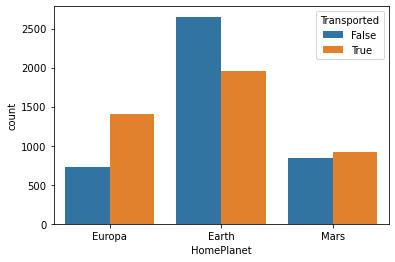

In [402]:
sns.countplot(data=df_train,x='HomePlanet',hue='Transported')

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

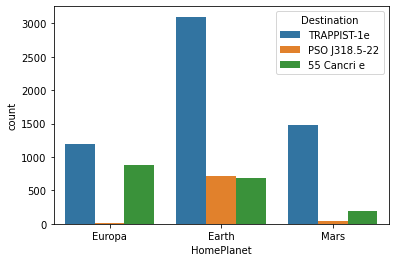

In [403]:
sns.countplot(data=df_train,x='HomePlanet',hue='Destination')

<AxesSubplot:xlabel='Destination', ylabel='count'>

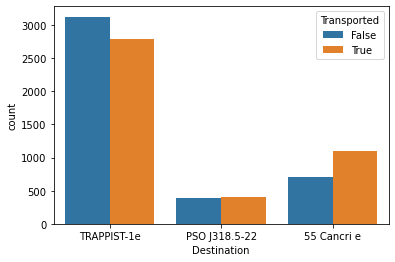

In [404]:
sns.countplot(data=df_train,x='Destination',hue='Transported')

Doing one hot encoding to then compare

In [405]:
df_train = df_train.drop(['CabinNumber'],axis=1)
my_object_df_train = df_train.select_dtypes(include='object')
my_numeric_df_train = df_train.select_dtypes(exclude='object')

<h1>One Hot Encoding</h1>

In [406]:
one_hot_econded_data_df_train = pd.get_dummies(df_train, columns=['Deck','CabinSide','Destination','HomePlanet'])
one_hot_econded_data_df_train

,CryoSleep,Age,VIP,Name,Transported,TotalBill,Group,Deck_A,Deck_B,Deck_C,...,Deck_G,Deck_T,CabinSide_P,CabinSide_S,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,False,39.0,False,Maham Ofracculy,False,0.0,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0
1,False,24.0,False,Juanna Vines,True,736.0,2,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,False,58.0,True,Altark Susent,False,10383.0,3,1,0,0,...,0,0,0,1,0,0,1,0,1,0
3,False,33.0,False,Solam Susent,False,5176.0,3,1,0,0,...,0,0,0,1,0,0,1,0,1,0
4,False,16.0,False,Willy Santantines,True,1091.0,4,0,0,0,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,Gravior Noxnuther,False,8536.0,9276,1,0,0,...,0,0,1,0,1,0,0,0,1,0
8689,True,18.0,False,Kurta Mondalley,False,0.0,9278,0,0,0,...,1,0,0,1,0,1,0,1,0,0
8690,False,26.0,False,Fayey Connon,True,1873.0,9279,0,0,0,...,1,0,0,1,0,0,1,1,0,0
8691,False,32.0,False,Celeon Hontichre,False,4637.0,9280,0,0,0,...,0,0,0,1,1,0,0,0,1,0


In [407]:
df_train = pd.concat([my_numeric_df_train,one_hot_econded_data_df_train],axis=1)
df_train

,CryoSleep,Age,VIP,Transported,TotalBill,Group,CryoSleep,Age,VIP,Name,...,Deck_G,Deck_T,CabinSide_P,CabinSide_S,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,False,39.0,False,False,0.0,1,False,39.0,False,Maham Ofracculy,...,0,0,1,0,0,0,1,0,1,0
1,False,24.0,False,True,736.0,2,False,24.0,False,Juanna Vines,...,0,0,0,1,0,0,1,1,0,0
2,False,58.0,True,False,10383.0,3,False,58.0,True,Altark Susent,...,0,0,0,1,0,0,1,0,1,0
3,False,33.0,False,False,5176.0,3,False,33.0,False,Solam Susent,...,0,0,0,1,0,0,1,0,1,0
4,False,16.0,False,True,1091.0,4,False,16.0,False,Willy Santantines,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,False,8536.0,9276,False,41.0,True,Gravior Noxnuther,...,0,0,1,0,1,0,0,0,1,0
8689,True,18.0,False,False,0.0,9278,True,18.0,False,Kurta Mondalley,...,1,0,0,1,0,1,0,1,0,0
8690,False,26.0,False,True,1873.0,9279,False,26.0,False,Fayey Connon,...,1,0,0,1,0,0,1,1,0,0
8691,False,32.0,False,False,4637.0,9280,False,32.0,False,Celeon Hontichre,...,0,0,0,1,1,0,0,0,1,0
